In [4]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re

In [3]:
data=pd.read_csv("/Users/sakshisingh/Documents/NLP/Intro to NLP/tripadvisor_hotel_reviews.csv")

In [5]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
data.shape

(109, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  109 non-null    object
 1   Rating  109 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [9]:
data['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [11]:
data['review_lowercase']=data['Review'].str.lower()

In [12]:
data

,Review,Rating,review_lowercase
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."
...,...,...,...
104,"fairmont hotel singapore splendid, stayed fair...",5,"fairmont hotel singapore splendid, stayed fair..."
105,great hotel stayed hotel night route perth chr...,4,great hotel stayed hotel night route perth chr...
106,great hotel centre stayed 5 nights room overlo...,4,great hotel centre stayed 5 nights room overlo...
107,great location great value great hotel husband...,5,great location great value great hotel husband...


In [13]:
en_stopwords=stopwords.words('english')
en_stopwords.remove('not')

In [14]:
data['review_not_stopwords']=data['review_lowercase'].apply(lambda x:' '.join(word for word in x.split() if word not in en_stopwords))

In [15]:
data

,Review,Rating,review_lowercase,review_not_stopwords
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso..."
...,...,...,...,...
104,"fairmont hotel singapore splendid, stayed fair...",5,"fairmont hotel singapore splendid, stayed fair...","fairmont hotel singapore splendid, stayed fair..."
105,great hotel stayed hotel night route perth chr...,4,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...
106,great hotel centre stayed 5 nights room overlo...,4,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...
107,great location great value great hotel husband...,5,great location great value great hotel husband...,great location great value great hotel husband...


In [16]:
data['review_lowercase'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [17]:
data['review_not_stopwords'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe noisy neighbors, aveda bath products nice, not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience pay 40 parking night,'

In [18]:
pattern_to_find=r'[^\w\s]'

In [22]:
data['review_no_punctuations']=data['review_not_stopwords'].apply(lambda x:re.sub(pattern_to_find,"",x))
                                                                 

In [23]:
data

,Review,Rating,review_lowercase,review_not_stopwords,review_no_punctuations
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...
...,...,...,...,...,...
104,"fairmont hotel singapore splendid, stayed fair...",5,"fairmont hotel singapore splendid, stayed fair...","fairmont hotel singapore splendid, stayed fair...",fairmont hotel singapore splendid stayed fairm...
105,great hotel stayed hotel night route perth chr...,4,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...
106,great hotel centre stayed 5 nights room overlo...,4,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...
107,great location great value great hotel husband...,5,great location great value great hotel husband...,great location great value great hotel husband...,great location great value great hotel husband...


In [24]:
data['review_no_punctuations'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice not goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [25]:
data['tokenize']=data['review_no_punctuations'].apply(lambda x: word_tokenize(x))

In [26]:
data

,Review,Rating,review_lowercase,review_not_stopwords,review_no_punctuations,tokenize
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game..."
...,...,...,...,...,...,...
104,"fairmont hotel singapore splendid, stayed fair...",5,"fairmont hotel singapore splendid, stayed fair...","fairmont hotel singapore splendid, stayed fair...",fairmont hotel singapore splendid stayed fairm...,"[fairmont, hotel, singapore, splendid, stayed,..."
105,great hotel stayed hotel night route perth chr...,4,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...,"[great, hotel, stayed, hotel, night, route, pe..."
106,great hotel centre stayed 5 nights room overlo...,4,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...,"[great, hotel, centre, stayed, 5, nights, room..."
107,great location great value great hotel husband...,5,great location great value great hotel husband...,great location great value great hotel husband...,great location great value great hotel husband...,"[great, location, great, value, great, hotel, ..."


In [27]:
ps=PorterStemmer()

In [29]:
data['stemmer']=data['tokenize'].apply(lambda x: [ps.stem(word) for word in x])

In [30]:
data

,Review,Rating,review_lowercase,review_not_stopwords,review_no_punctuations,tokenize,stemmer
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, room, not, 4, experi, hotel, monaco, se..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
...,...,...,...,...,...,...,...
104,"fairmont hotel singapore splendid, stayed fair...",5,"fairmont hotel singapore splendid, stayed fair...","fairmont hotel singapore splendid, stayed fair...",fairmont hotel singapore splendid stayed fairm...,"[fairmont, hotel, singapore, splendid, stayed,...","[fairmont, hotel, singapor, splendid, stay, fa..."
105,great hotel stayed hotel night route perth chr...,4,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...,"[great, hotel, stayed, hotel, night, route, pe...","[great, hotel, stay, hotel, night, rout, perth..."
106,great hotel centre stayed 5 nights room overlo...,4,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...,"[great, hotel, centre, stayed, 5, nights, room...","[great, hotel, centr, stay, 5, night, room, ov..."
107,great location great value great hotel husband...,5,great location great value great hotel husband...,great location great value great hotel husband...,great location great value great hotel husband...,"[great, location, great, value, great, hotel, ...","[great, locat, great, valu, great, hotel, husb..."


In [31]:
lemmatizer=WordNetLemmatizer()

In [32]:
data['lemmatized']=data['tokenize'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [33]:
data

,Review,Rating,review_lowercase,review_not_stopwords,review_no_punctuations,tokenize,stemmer,lemmatized
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,nice hotel expensive parking got good deal sta...,"[nice, hotel, expensive, parking, got, good, d...","[nice, hotel, expens, park, got, good, deal, s...","[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,ok nothing special charge diamond member hilto...,"[ok, nothing, special, charge, diamond, member...","[ok, noth, special, charg, diamond, member, hi...","[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4* experience hotel monaco seat...,nice rooms not 4 experience hotel monaco seatt...,"[nice, rooms, not, 4, experience, hotel, monac...","[nice, room, not, 4, experi, hotel, monaco, se...","[nice, room, not, 4, experience, hotel, monaco..."
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac...","unique, great stay, wonderful time hotel monac...",unique great stay wonderful time hotel monaco ...,"[unique, great, stay, wonderful, time, hotel, ...","[uniqu, great, stay, wonder, time, hotel, mona...","[unique, great, stay, wonderful, time, hotel, ..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso...","great stay great stay, went seahawk game aweso...",great stay great stay went seahawk game awesom...,"[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game...","[great, stay, great, stay, went, seahawk, game..."
...,...,...,...,...,...,...,...,...
104,"fairmont hotel singapore splendid, stayed fair...",5,"fairmont hotel singapore splendid, stayed fair...","fairmont hotel singapore splendid, stayed fair...",fairmont hotel singapore splendid stayed fairm...,"[fairmont, hotel, singapore, splendid, stayed,...","[fairmont, hotel, singapor, splendid, stay, fa...","[fairmont, hotel, singapore, splendid, stayed,..."
105,great hotel stayed hotel night route perth chr...,4,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...,great hotel stayed hotel night route perth chr...,"[great, hotel, stayed, hotel, night, route, pe...","[great, hotel, stay, hotel, night, rout, perth...","[great, hotel, stayed, hotel, night, route, pe..."
106,great hotel centre stayed 5 nights room overlo...,4,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...,great hotel centre stayed 5 nights room overlo...,"[great, hotel, centre, stayed, 5, nights, room...","[great, hotel, centr, stay, 5, night, room, ov...","[great, hotel, centre, stayed, 5, night, room,..."
107,great location great value great hotel husband...,5,great location great value great hotel husband...,great location great value great hotel husband...,great location great value great hotel husband...,"[great, location, great, value, great, hotel, ...","[great, locat, great, valu, great, hotel, husb...","[great, location, great, value, great, hotel, ..."


In [41]:
data_clean=sum(data['lemmatized'],[])

In [43]:
unigrams=pd.Series(nltk.ngrams(data_clean,1)).value_counts()

<Axes: >

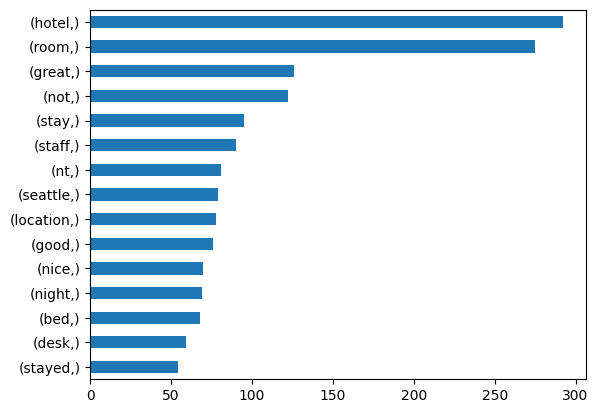

In [47]:
unigrams[:15].sort_values().plot.barh()

In [48]:
bigrams=pd.Series(nltk.ngrams(data_clean,2)).value_counts()

<Axes: >

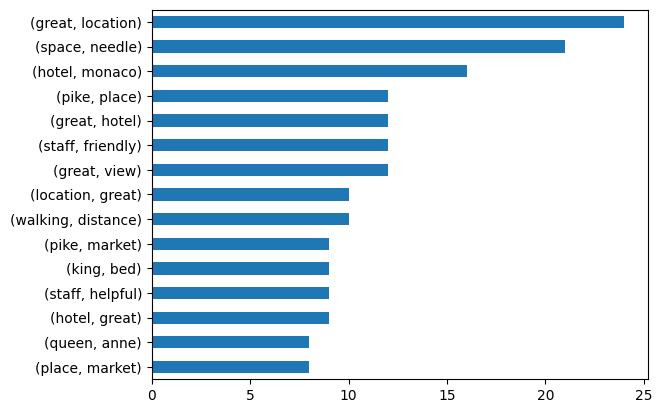

In [49]:
bigrams[:15].sort_values().plot.barh()

In [50]:
trigrams=pd.Series(nltk.ngrams(data_clean,3)).value_counts()

<Axes: >

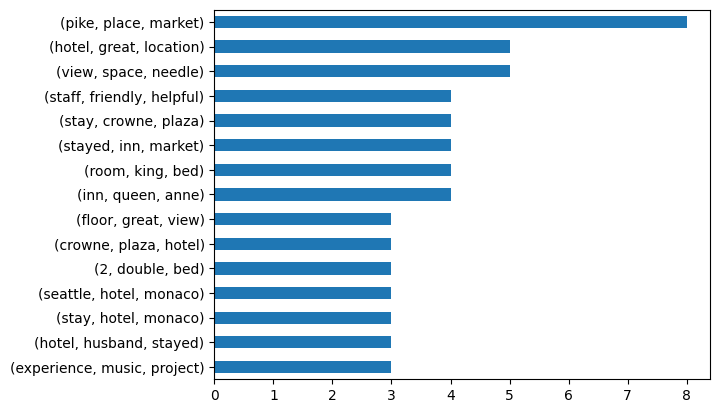

In [51]:
trigrams[:15].sort_values().plot.barh()